In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
%matplotlib inline

In [ ]:
pip install researchpy

In [ ]:
import researchpy as researchpy
from scipy import stats

In [ ]:
data=pd.read_csv("/content/day.csv")
data.shape

(731, 16)

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# subsetting the data
bike_sharing_data=data[["season","mnth","holiday","workingday","weathersit","temp","cnt"]]

In [ ]:
bike_sharing_data.to_csv("bike_sharing_data_processed.csv",index=False)

In [ ]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [ ]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   workingday  731 non-null    int64  
 4   weathersit  731 non-null    int64  
 5   temp        731 non-null    float64
 6   cnt         731 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.1 KB


In [ ]:
bike_sharing_data["season"].unique()

array([1, 2, 3, 4])

In [ ]:
bike_sharing_data["workingday"].unique()

array([0, 1])

In [ ]:
bike_sharing_data["holiday"].unique()

array([0, 1])

In [ ]:
bike_sharing_data["weathersit"].unique()

array([2, 1, 3])

In [ ]:
bike_sharing_data["temp"].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

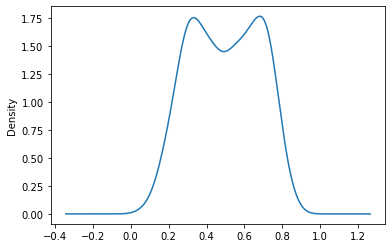

In [ ]:
bike_sharing_data["temp"].plot(kind="kde")

We use t-test to compare differences in means between two samples of population and see whether the difference is significant or not.
* we will use t-test to see whether the average number of bikes rented on a working day versus a non-working day is different, and whether this difference is significant. 


In [ ]:
# lets first use groupby to see if averages are different or not
bike_sharing_data.groupby("workingday")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


* we can see the number of records for working day and non working day are different.And at the same time means are also different
* but we want to see if this difference in the mean is significant

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


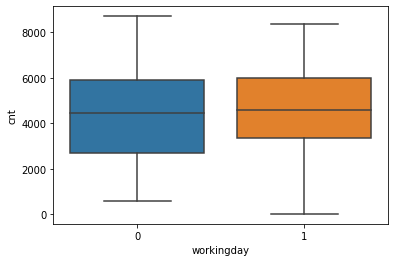

In [ ]:
# lets visualize it using a boxplot
sns.boxplot(bike_sharing_data["workingday"],bike_sharing_data["cnt"])

Independent t-test

In [ ]:
sample_01=bike_sharing_data[bike_sharing_data["workingday"]==0]
sample_02=bike_sharing_data[bike_sharing_data["workingday"]==1]

In [ ]:
sample_01.shape,sample_02.shape

((231, 7), (500, 7))

In [ ]:
# for independent t-test the number of sample should be same so to fix this lets sample 231 randomly from sample_01
import random
sample_02=sample_02.sample(n=231,random_state=42)

In [ ]:
sample_01.shape,sample_02.shape

((231, 7), (231, 7))

* check whether the assumption made for the t-test are satified
* first check equal variance of two groups  using levene test
* levene test is similar to t-test but it test for equal variance rather than equal means

In [ ]:
from scipy.stats import levene
levene(sample_02["cnt"],sample_01["cnt"])

LeveneResult(statistic=3.979889033842622, pvalue=0.04663610361247089)

 so our p-value is just exactly equal to 0.05 significance level...to proceed with t-test lets assume significance level of 0.01 and fail to reject the null hypothesis.Thus we have equal variance

 * second assumption is the distribution of the residuals between the two groups should follow the normal distribution

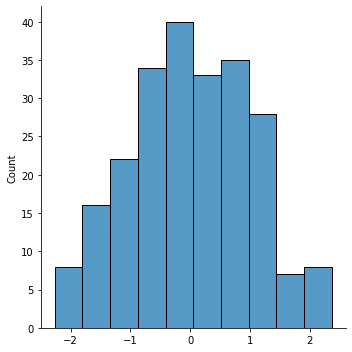

In [ ]:
# lets calculate the residulas and standardise them to make them easy to work with

diff=scale(np.array(sample_01["cnt"])-np.array(sample_02["cnt"]))
#plot the residuals
sns.displot(diff)

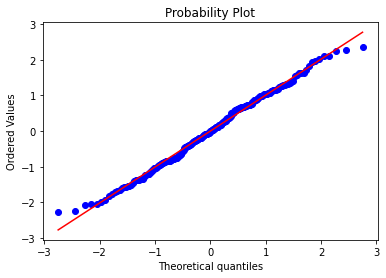

In [ ]:
#this give sus a rough idea of the residuals distributions
# lets do a probapility plot
stats.probplot(diff,plot=plt,dist="norm");

So residual data very closely follows the normal distribution.At greater than 2 standard deviation on either side the data does not track the red line. The rest of the data very closely follows the normal distribution
* another test is Shapiro-Wilk test for normality


In [ ]:
# shapiro Wilk test
stats.shapiro(diff)

(0.9917704463005066, 0.2214667797088623)

so above p-value is gretaer than 5% thus not significant so our data is normally distributed

## independent t-test

In [ ]:
stats.ttest_ind(sample_01["cnt"],sample_02["cnt"])

Ttest_indResult(statistic=-0.7125247222345579, pvalue=0.476501159234212)

the p value from above test is almost 47% which means we can reject the alternate hypothesis and fail to reject the null hypothesis.
Null hypothesis says the means of two groups is same 
which means be it working day or non working day there is no diffrence in bikes shared

In [ ]:
import researchpy as rp

In [ ]:
descriptive,results= rp.ttest(sample_01["cnt"],sample_02["cnt"])

In [ ]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =  -129.5801
1      Degrees of freedom =   460.0000
2                       t =    -0.7125
3   Two side test p value =     0.4765
4  Difference < 0 p value =     0.2383
5  Difference > 0 p value =     0.7617
6               Cohen's d =    -0.0663
7               Hedge's g =    -0.0662
8           Glass's delta =    -0.0631
9             Pearson's r =     0.0332


## lets use temperature and cnt to do indepemdent test
but for t test we need a categorical indepndent variable to create two groups
lets create a categorical variable out of temperature variable.
To understand how temperature values are distributed across our data lets look at the boxplot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


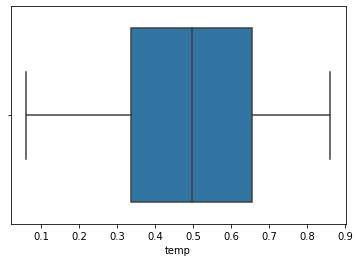

In [ ]:
sns.boxplot(bike_sharing_data["temp"])

In [ ]:
# if temperature on a certain day is gereater than mean then True else false
bike_sharing_data["temp_category"]=[True  if val > bike_sharing_data["temp"].mean() else False for val in bike_sharing_data["temp"] ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
480,2,4,0,1,1,0.476667,6196,False
304,4,11,0,1,1,0.400833,4068,False
315,4,11,0,0,1,0.356667,4067,False
642,4,10,0,1,2,0.657500,7328,True
94,2,4,0,1,2,0.414167,1795,False
1,1,1,0,0,2,0.363478,801,False
203,3,7,0,0,1,0.849167,3285,True
309,4,11,0,0,1,0.348333,3649,False
728,1,12,0,0,2,0.253333,1341,False
674,4,11,0,1,1,0.319167,5259,False


In [ ]:
# quick summary of two groups based on temperature category
bike_sharing_data.groupby("temp_category")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


So from above data we can infer than on warmer days more bike were rented around 5600 and on coller days around 3400 bikes were rented.
- Lets look at the boxplot to get the more firmer grip

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


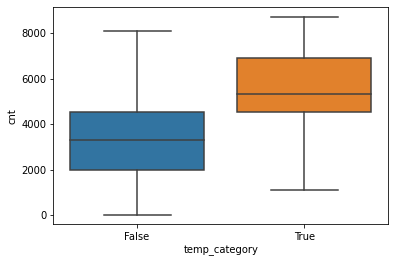

In [ ]:
sns.boxplot(bike_sharing_data["temp_category"],bike_sharing_data["cnt"]);

So box plot shows that these two distributions have very diffrent mens and medians but is this difference significant, we will see it using independent t-test

In [ ]:
# split the dataset into two samples
sample_01=bike_sharing_data[bike_sharing_data["temp_category"]==True]
sample_02=bike_sharing_data[bike_sharing_data["temp_category"]==False]

In [ ]:
sample_01.shape,sample_02.shape

((367, 8), (364, 8))

In [ ]:
sample_01=sample_01.sample(364,random_state=42)

In [ ]:
sample_01.shape,sample_02.shape

((364, 8), (364, 8))

In [ ]:
# lets check for equal variance
stats.levene(sample_01["cnt"],sample_02["cnt"])


LeveneResult(statistic=4.564007482766761, pvalue=0.03298435958007329)

p-value less than 0.05. Thus test is significant and we conclude that two groups have unequal variance.
Thus one of the assumption of independent t-test doesnot satisfy
 * second assumption is the distribution of the residuals between the two groups should follow the normal distribution

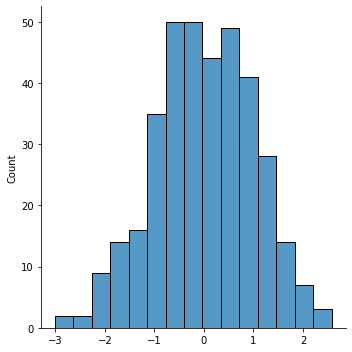

In [ ]:
# lets calculate the residulas and standardise them to make them easy to work with

diff=scale(np.array(sample_01["cnt"])-np.array(sample_02["cnt"]))
#plot the residuals
sns.displot(diff)

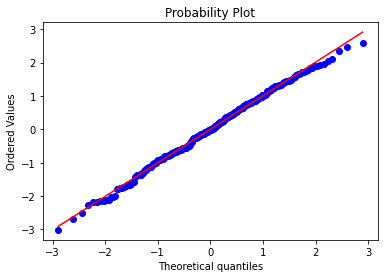

In [ ]:
#this give sus a rough idea of the residuals distributions
# lets do a probapility plot
stats.probplot(diff,plot=plt,dist="norm");

In [ ]:
stats.shapiro(diff)

(0.9964540004730225, 0.6013275980949402)

p-value tells me to reject the alternate hypothesis and tells that the resuduals are normally distributed

independent t-test

In [ ]:
stats.ttest_ind(sample_01["cnt"],sample_02["cnt"])

Ttest_indResult(statistic=18.882647454849966, pvalue=5.321364296288734e-65)

p-value is very very low thus the test is significant which tells me the number of bikes rented on hot days versus the cooler days are significantly different

But our levene test told us that the variance of the two groups are not same so in that case we have to do welch's t-test 

In [ ]:
stats.ttest_ind(sample_01["cnt"],sample_02["cnt"],equal_var=False)# equal_var=False for welch's t-test

Ttest_indResult(statistic=18.882647454849966, pvalue=8.433331318671356e-65)

In [ ]:
#using researchpy library to calculate welch's t-test
descriptive,results=rp.ttest(sample_01["cnt"],sample_02["cnt"],equal_variances=False)

In [ ]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2222.7692
1      Degrees of freedom =    715.0668
2                       t =     18.8826
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3997
7               Hedge's g =      1.3982
8           Glass's delta =      1.5043
9             Pearson's r =      0.5768


p-value equal to zero from both scipy and researchpy shows that the number of bikes rented on hot days versus the cooler days are significantly different

## Paired t-test

In [206]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
%matplotlib inline

In [207]:
data=pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")

In [208]:
data

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [211]:
data.info(),data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


(None, (120, 5))

In [210]:
# use paired t-test to see that the blood pressure before and after the intervention are statisticaly significant

In [213]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


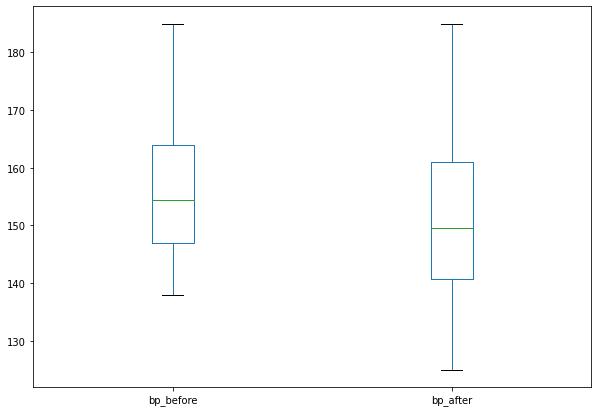

In [220]:
#Lets take a quick look at the data visually using boxplot
data[["bp_before","bp_after"]].plot(kind="box",figsize=(10,7))

boxplot shows us that the median and ranges are different but is the difference significant lets test
- assumption Checks
  - equal variance between two groups or not using levene test
  - normality of residuals of two groups
  

In [221]:
stats.levene(data["bp_before"],data["bp_after"])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

p-value less than 0.05 implies variance across the two groups is not same. thus it tells us we cant use independent t-test for our paired samples

In [222]:
# lets check normality of residuals
bp_diff=scale(np.array(data["bp_before"])-np.array(data["bp_after"]))

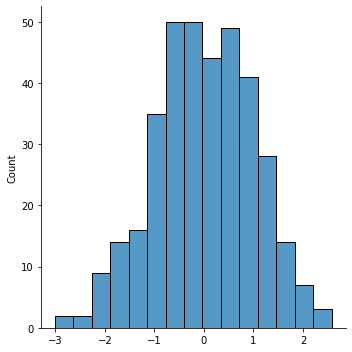

In [223]:
sns.displot(diff)

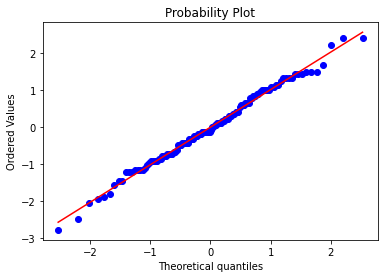

In [225]:
stats.probplot(bp_diff,plot=plt,dist="norm");

In [226]:
stats.shapiro(bp_diff)

(0.992684006690979, 0.7841646671295166)

all the three measures used(histogram,probplots,shapiro test) show that the residuals are normally distributed

In [227]:
# now perform the t-test
stats.ttest_rel(data["bp_before"],data["bp_after"])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

p-value is less than 0.05% thus the test is significant and the difference in means before the intervention and after the intervention is different.
- But levene test showed us that the two groups have unequal varainces thus we cant completely rely on this t-test

In [235]:
# use researchpy library to perform paired t-test fro the paired groupes with unequal variances
rp.ttest(data["bp_before"],data["bp_after"],paired=True,equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,W value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


above p-value also shows that the intervention performed has a significant effect on the blood pressures